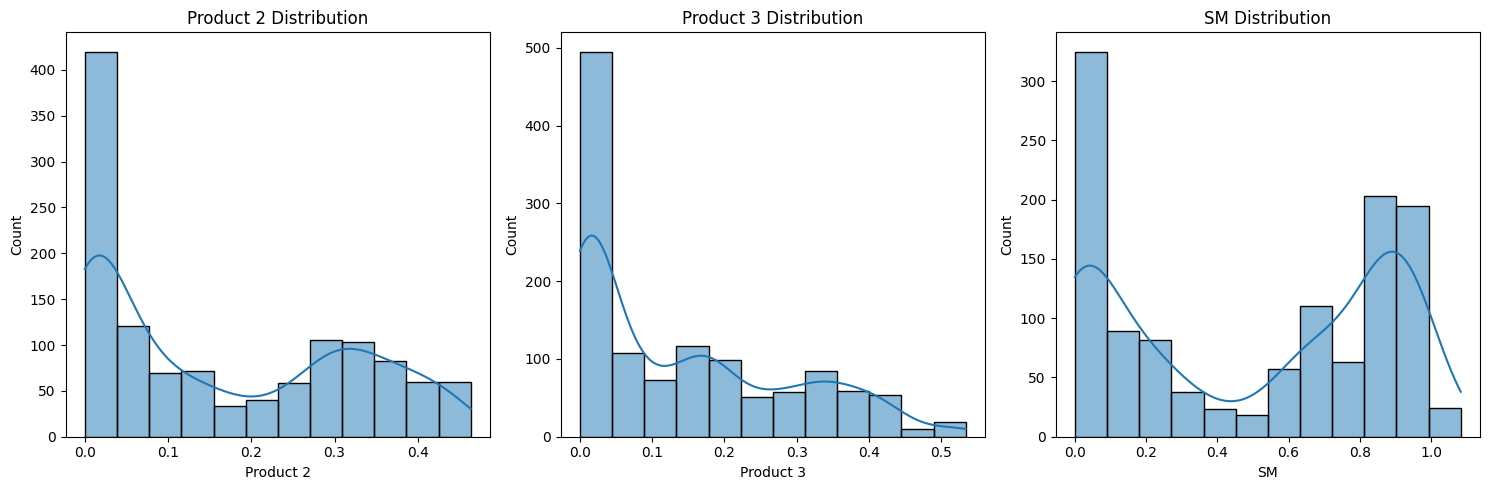

Min values:
Product 2    0.0
Product 3    0.0
SM           0.0
dtype: float64

Max values:
Product 2    0.463632
Product 3    0.533768
SM           1.083254
dtype: float64


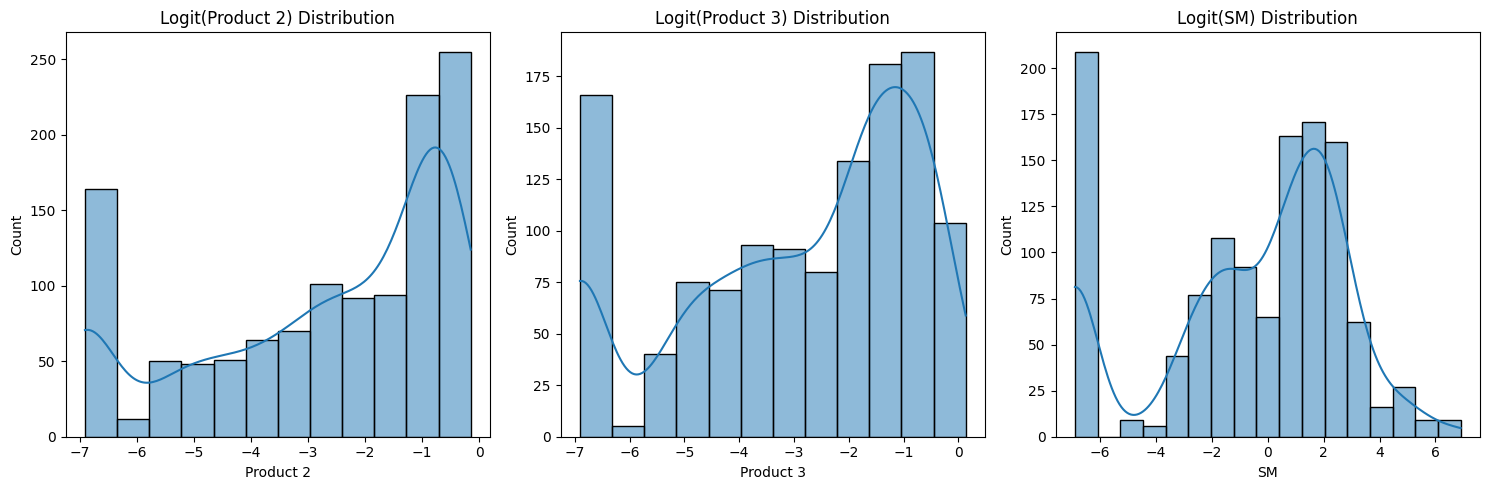

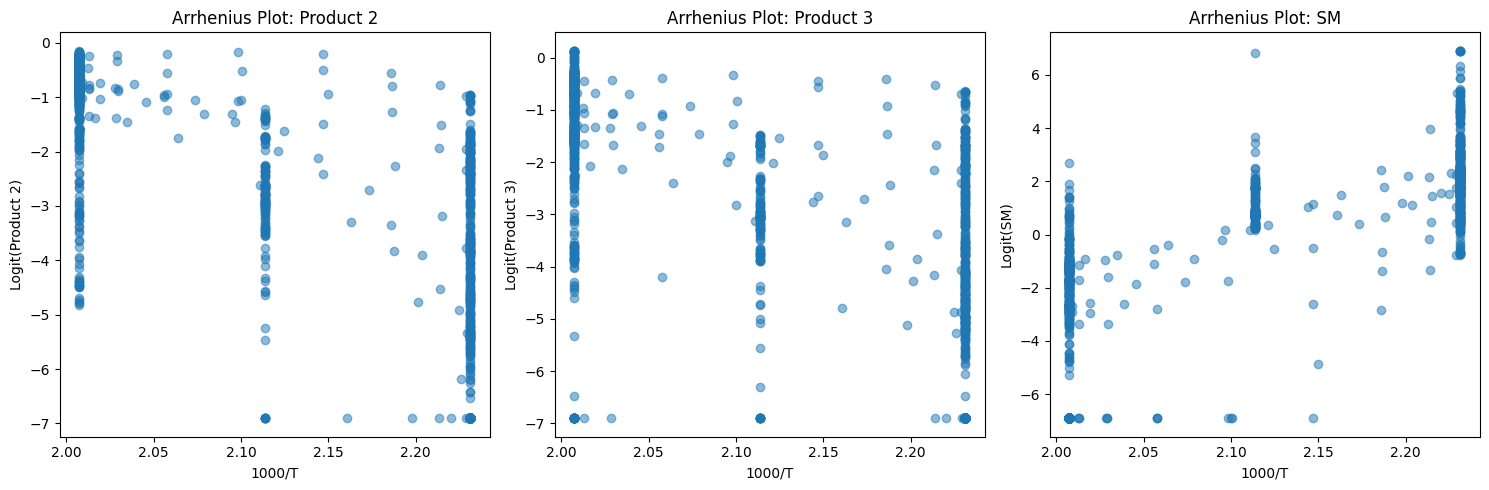

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df_full = pd.read_csv('/home/data/catechol_full_data_yields.csv')
targets = ['Product 2', 'Product 3', 'SM']

# Check distribution
plt.figure(figsize=(15, 5))
for i, target in enumerate(targets):
    plt.subplot(1, 3, i+1)
    sns.histplot(df_full[target], kde=True)
    plt.title(f'{target} Distribution')
plt.tight_layout()
plt.show()

# Check bounds
print("Min values:")
print(df_full[targets].min())
print("\nMax values:")
print(df_full[targets].max())

# Test Logit Transform
def logit(x, clip_eps=1e-3):
    x_clipped = np.clip(x, clip_eps, 1-clip_eps)
    return np.log(x_clipped / (1 - x_clipped))

# Visualize transformed
plt.figure(figsize=(15, 5))
for i, target in enumerate(targets):
    plt.subplot(1, 3, i+1)
    y_logit = logit(df_full[target])
    sns.histplot(y_logit, kde=True)
    plt.title(f'Logit({target}) Distribution')
plt.tight_layout()
plt.show()

# Check correlation with Temperature (Arrhenius-like behavior)
# 1000/T vs Logit(Yield) might be more linear?
df_full['inv_temp'] = 1000 / (df_full['Temperature'] + 273.15)

plt.figure(figsize=(15, 5))
for i, target in enumerate(targets):
    plt.subplot(1, 3, i+1)
    plt.scatter(df_full['inv_temp'], logit(df_full[target]), alpha=0.5)
    plt.xlabel('1000/T')
    plt.ylabel(f'Logit({target})')
    plt.title(f'Arrhenius Plot: {target}')
plt.tight_layout()
plt.show()
